# 中山芝1600m

In [1]:
%run 0.2_Function.ipynb

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 2005-2025 東京
df = result_df("成績", "2015", "2025", ["中"])

In [4]:
distance = df["距離"] == 1600
ground_type = df["芝・ダ"] == "芝"
except_cond = df['異常コード'] == 0
arrival = df["確定着順"] <= 5
baba = df['馬場状態'] == "良"
cond = distance & ground_type & except_cond & baba & arrival
df = df[cond]

In [5]:
df[
    [
        "レース日",
        "回次",
        "日次",
        "レース名",
        "クラスコード",
        "馬名",
        "走破タイム",
        "上がり3Fタイム",
        "PCI",
        "馬場状態",
        "年齢",
        "騎手名",
        "単勝オッズ",
    ]
].sort_values("走破タイム").head(10)

,レース日,回次,日次,レース名,クラスコード,馬名,走破タイム,上がり3Fタイム,PCI,馬場状態,年齢,騎手名,単勝オッズ
4699,2019-09-08,4,2,オータムＨG3,163,トロワゼトワル,90.3,34.9,45.2,良,4,横山典弘,7.2
9005,2024-09-08,4,2,オータムＨG3,163,アスコリピチェーノ,90.8,32.7,56.6,良,3,ルメール,1.5
4691,2019-09-08,4,2,オータムＨG3,163,ジャンダルム,90.9,34.2,49.5,良,4,藤井勘一,28.2
4700,2019-09-08,4,2,オータムＨG3,163,ディメンシオン,90.9,34.2,49.5,良,5,北村宏司,9.4
4690,2019-09-08,4,2,オータムＨG3,163,プロディガルサン,91.0,33.5,53.0,良,6,三浦皇成,6.8
9010,2024-09-08,4,2,オータムＨG3,163,タイムトゥヘヴン,91.0,32.4,58.5,良,6,柴田善臣,161.8
4692,2019-09-08,4,2,オータムＨG3,163,カルヴァリオ,91.0,33.9,51.1,良,6,黛弘人,276.2
9003,2024-09-08,4,2,オータムＨG3,163,サンライズロナウド,91.0,33.4,53.5,良,5,横山典弘,10.7
9006,2024-09-08,4,2,オータムＨG3,163,ジューンオレンジ,91.3,32.9,56.5,良,4,富田暁,88.7
9008,2024-09-08,4,2,オータムＨG3,163,セルバーグ,91.3,33.4,54.0,良,5,武豊,34.7


In [6]:
class_code_labels = {
    7: "新馬、未勝利",
    11: "新馬、未勝利",
    15: "新馬、未勝利",
    19: "1-3勝クラス",
    23: "1-3勝クラス",
    39: "1-3勝クラス",
    43: "1-3勝クラス",
    63: "1-3勝クラス",
    67: "1-3勝クラス",
    115: "OP以上",
    131: "OP以上",
    147: "OP以上",
    163: "OP以上",
    179: "OP以上",
    195: "OP以上",
}

df["クラス分類"] = df["クラスコード"].map(class_code_labels)


<Axes: xlabel='クラス分類', ylabel='走破タイム'>

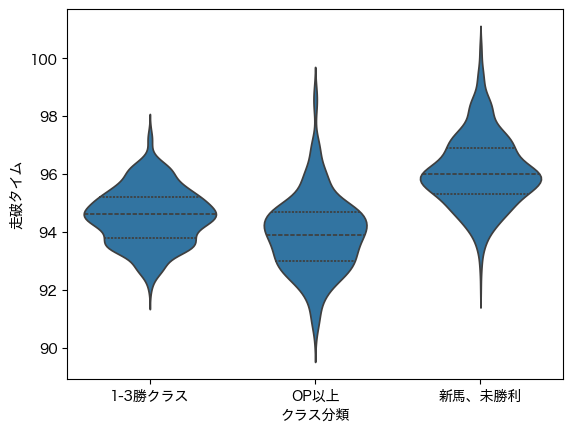

In [7]:
sns.violinplot(
    data=df,
    x="クラス分類",
    y="走破タイム",
    inner="quartile"
)


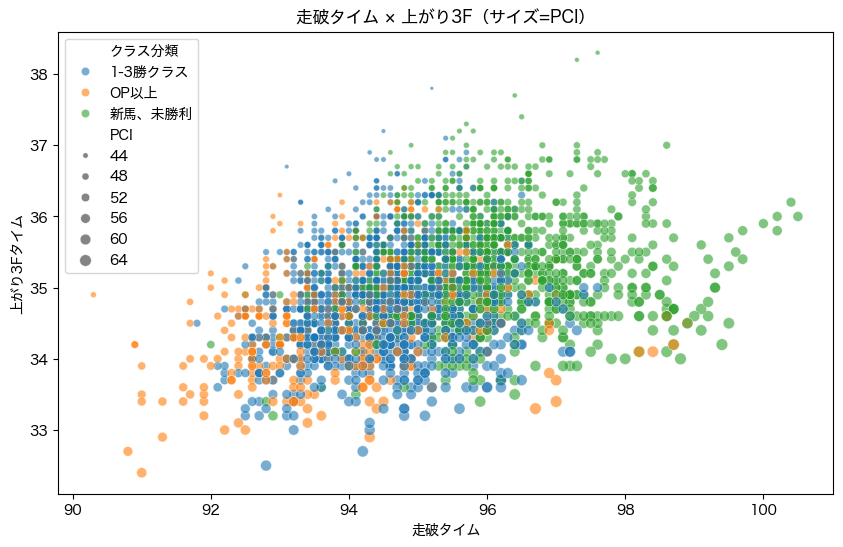

In [15]:

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x="走破タイム",
    y="上がり3Fタイム",
    hue="クラス分類",
    size="PCI",
    sizes=(7, 70),
    alpha=0.6
)
plt.title("走破タイム × 上がり3F（サイズ=PCI）")
plt.show()

ざっくりとした傾向だが、

2秒前半の走破タイムかつ上がり33秒台